# Итоговый проект: вариант 1

In [9]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore') 

import scipy.stats as ss
from tqdm.auto import tqdm

from operator import attrgetter

%matplotlib inline

In [10]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize': (20, 7)})

##  Задание 1

Retention – один из самых важных показателей в компании. Ваша задача – написать функцию, которая будет считать retention игроков (по дням от даты регистрации игрока).

**Требование**: Функция должна быть написана на python. В ходе решения можно тестировать работу функции как на полном датасете, так и на части (сэмпле) данных.

In [11]:
register_df = pd.read_csv('problem1-reg_data.csv', sep=';')
authorization_df = pd.read_csv('problem1-auth_data.csv', sep=';')

Проведем разведочный анализ первого датафрейма

In [12]:
register_df

,reg_ts,uid
0,911382223,1
1,932683089,2
2,947802447,3
3,959523541,4
4,969103313,5
...,...,...
999995,1600874034,1110618
999996,1600874086,1110619
999997,1600874139,1110620
999998,1600874191,1110621


In [13]:
register_df.shape

(1000000, 2)

In [14]:
register_df.dtypes

reg_ts    int64
uid       int64
dtype: object

In [15]:
# Проверим пропущенные значения
register_df.isna().sum()

reg_ts    0
uid       0
dtype: int64

In [16]:
register_df.nunique()

reg_ts    1000000
uid       1000000
dtype: int64

По предыдущим шагам видно, что пропуски отсутсвуют и даты регистрации пользователей представлены в UNIX формате

In [17]:
# Так как время регистрации представлена в формате UNIX time переобразуем его
register_df['default_date_reg'] = pd.to_datetime(register_df.reg_ts, unit='s')

In [18]:
register_df.head()

,reg_ts,uid,default_date_reg
0,911382223,1,1998-11-18 09:43:43
1,932683089,2,1999-07-22 22:38:09
2,947802447,3,2000-01-13 22:27:27
3,959523541,4,2000-05-28 14:19:01
4,969103313,5,2000-09-16 11:21:53


In [19]:
# Посмотрим описательную статистику по новой колонке
register_df.default_date_reg.describe(datetime_is_numeric=True)

count                          1000000
mean     2019-01-24 12:12:34.523629056
min                1998-11-18 09:43:43
25%         2018-06-03 13:55:11.500000
50%                2019-07-30 02:35:25
75%      2020-04-01 16:28:40.499999744
max                2020-09-23 15:17:24
Name: default_date_reg, dtype: object

<AxesSubplot:xlabel='uid', ylabel='reg_ts'>

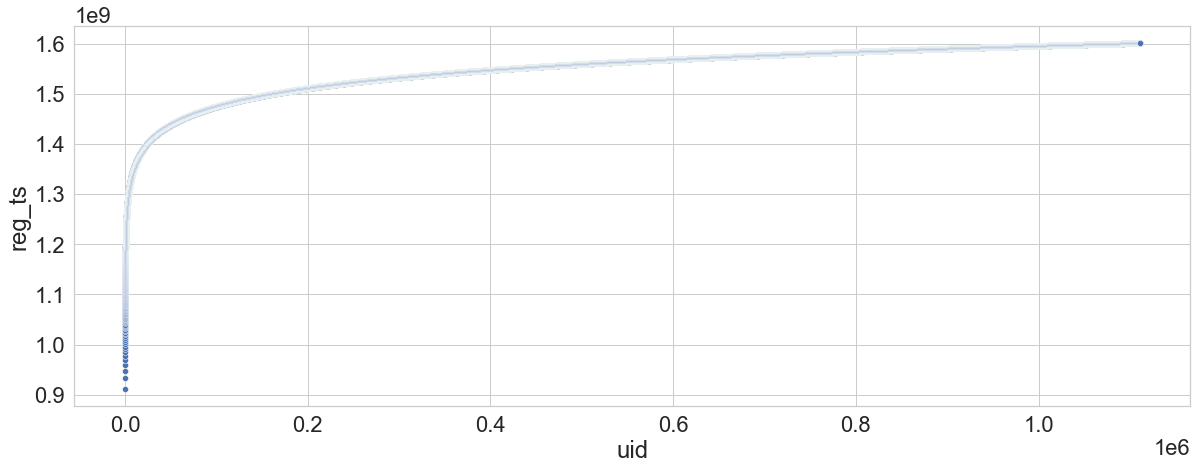

In [20]:
sns.scatterplot(x='uid', y='reg_ts', data=register_df)

<AxesSubplot:xlabel='reg_ts', ylabel='Density'>

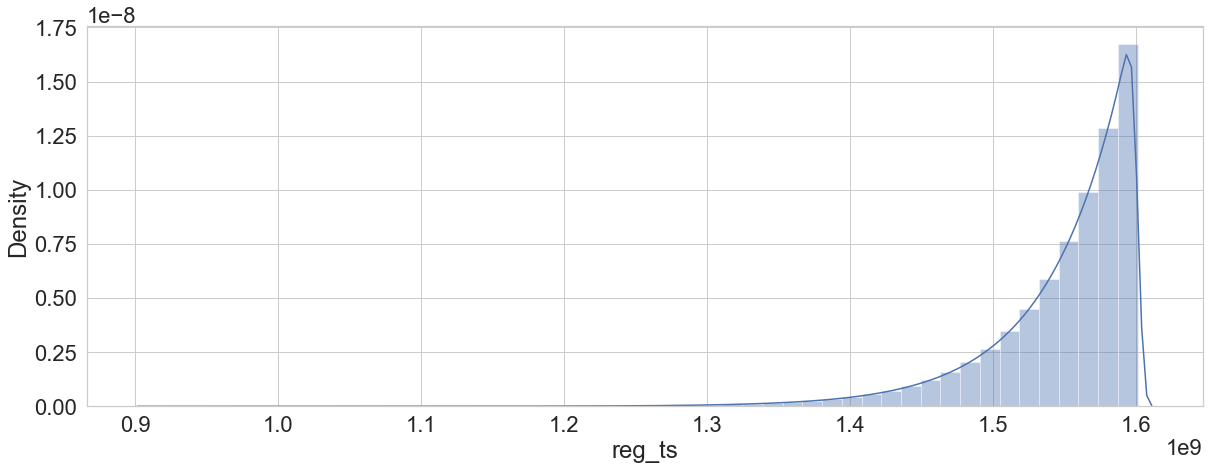

In [21]:
sns.distplot(register_df.reg_ts)

In [22]:
ss.spearmanr(register_df.uid, register_df.reg_ts)

SpearmanrResult(correlation=1.0, pvalue=0.0)

Во фрейме регистрации пользователей "грязных" данных нет, и сохраняется закономерность каждому юзеру принадлежит свое время регистрации, при этом чем ближе время регистрации к текущей дате, тем больше id пользователя

Посмотрим на данные во фрейме авторизации

In [23]:
authorization_df.head()

,auth_ts,uid
0,911382223,1
1,932683089,2
2,932921206,2
3,933393015,2
4,933875379,2


In [24]:
authorization_df.shape 

(9601013, 2)

In [25]:
authorization_df.dtypes

auth_ts    int64
uid        int64
dtype: object

In [26]:
authorization_df.isna().sum()

auth_ts    0
uid        0
dtype: int64

In [27]:
authorization_df.nunique()

auth_ts    9180915
uid        1000000
dtype: int64

In [28]:
# Так же переведем время в стандартный формат
authorization_df['default_date_auth'] = pd.to_datetime(authorization_df.auth_ts, unit='s')

In [29]:
# Посмотрим описательную статистику по новой колонке
authorization_df.default_date_auth.describe(datetime_is_numeric=True)

count                          9601013
mean     2019-01-29 16:12:06.254660096
min                1998-11-18 09:43:43
25%                2018-06-07 12:40:47
50%                2019-07-31 12:43:16
75%                2020-04-02 10:25:21
max                2020-09-23 15:17:24
Name: default_date_auth, dtype: object

По рассмотренным данным видно, что аномалий нет и каждому пользователю сопоставляется корректное время. 

Но возникает вопрос, о временном промежутке представленном в данных (он достаточно внушительный) и либо была допущена ошибка при сборе данных, либо мы хотим убедиться какое количество пользователей осталось с нами за весь промежуток существования проекта.





Добавим день регистрации пользователя к дате авторизации пользователя, чтобы посмотреть, присутствуют или нет даты регистрации во 2 фрейме

In [30]:
df_merge = authorization_df.merge(register_df, how='left', on='uid')

In [31]:
df_merge.nunique()

auth_ts              9180915
uid                  1000000
default_date_auth    9180915
reg_ts               1000000
default_date_reg     1000000
dtype: int64

In [32]:
df_merge

,auth_ts,uid,default_date_auth,reg_ts,default_date_reg
0,911382223,1,1998-11-18 09:43:43,911382223,1998-11-18 09:43:43
1,932683089,2,1999-07-22 22:38:09,932683089,1999-07-22 22:38:09
2,932921206,2,1999-07-25 16:46:46,932683089,1999-07-22 22:38:09
3,933393015,2,1999-07-31 03:50:15,932683089,1999-07-22 22:38:09
4,933875379,2,1999-08-05 17:49:39,932683089,1999-07-22 22:38:09
...,...,...,...,...,...
9601008,1600874034,1110618,2020-09-23 15:13:54,1600874034,2020-09-23 15:13:54
9601009,1600874086,1110619,2020-09-23 15:14:46,1600874086,2020-09-23 15:14:46
9601010,1600874139,1110620,2020-09-23 15:15:39,1600874139,2020-09-23 15:15:39
9601011,1600874191,1110621,2020-09-23 15:16:31,1600874191,2020-09-23 15:16:31


In [33]:
# Проверим, есть ли день регисрации пользователя в данных об авторизации
# Если размер фрейма будет равен 1 миллиону, то данные о регистрации присутствуют и можно работать с одним фреймом
df_merge[df_merge['default_date_auth'] == df_merge['default_date_reg']].drop_duplicates(subset=['uid'])

,auth_ts,uid,default_date_auth,reg_ts,default_date_reg
0,911382223,1,1998-11-18 09:43:43,911382223,1998-11-18 09:43:43
1,932683089,2,1999-07-22 22:38:09,932683089,1999-07-22 22:38:09
42,947802447,3,2000-01-13 22:27:27,947802447,2000-01-13 22:27:27
74,959523541,4,2000-05-28 14:19:01,959523541,2000-05-28 14:19:01
103,969103313,5,2000-09-16 11:21:53,969103313,2000-09-16 11:21:53
...,...,...,...,...,...
9601008,1600874034,1110618,2020-09-23 15:13:54,1600874034,2020-09-23 15:13:54
9601009,1600874086,1110619,2020-09-23 15:14:46,1600874086,2020-09-23 15:14:46
9601010,1600874139,1110620,2020-09-23 15:15:39,1600874139,2020-09-23 15:15:39
9601011,1600874191,1110621,2020-09-23 15:16:31,1600874191,2020-09-23 15:16:31


In [34]:
# Возьмем нужные колонки
need_df = authorization_df[['uid', 'default_date_auth']]

In [35]:
# Отберем нужную дату от которой будет смотреть когорты
register_df['default_date_reg_day'] = register_df.default_date_reg.dt.to_period('d')
register_df = register_df.query('default_date_reg_day > "2019-09-23"')

In [36]:
def cohort_analysis(df, sampl_df=pd.DataFrame(), border_head=30, border=30, period='d'):
    
    """
    На вход функция принимает:
    df - датафрейм по которому будет производиться расчет
    sampl_df - датафрейм по которому происходит отбор необходимых когорт пользователей
    border_head- количество когорт
    border - количество необходимых периодов (к примеру: если это расчет retention по дня, можно установить 28 или 30)
    period - параметр отвечающий за период расчета retention (день, месяц) 
    """
    
    # Распоковывем названия столбцов в нужные переменные
    customer, date = [i for i in list(df.columns)]
    
    # Период для каждой авторизации пользователя
    df['order_day'] = df[date].dt.to_period(period)
    
    # Определим когорты, взяв период от даты регистрации пользователя
    df['cohort'] = df.groupby(customer)[date] \
                     .transform('min') \
                     .dt.to_period('d')
    
    # Проверяем условие, если переданный датафрейм не пустой,
    # то вычисляем нужное количество когорт, если нет, то расчет производится по всему набору данных
    if sampl_df.shape[0] != 0:
        def need_date(df_smpl):
            df_smpl = df_smpl.drop_duplicates(subset='default_date_reg_day').head(border_head)
            sampl = list(df_smpl.default_date_reg_day)
            return sampl
        need_date_day = need_date(sampl_df)
        df = df.query('cohort in @need_date_day')
    
    # Подсчитываем кол-во уникальных пользователей в когорте
    df_cohort = df.groupby(['cohort', 'order_day']) \
                  .agg(n_customers=(customer, 'nunique')) \
                  .reset_index(drop=False)

    # Формируем количество периодов между месяцем когорты и месяцем покупки
    df_cohort['period_number'] = (df_cohort.order_day - df_cohort.cohort).apply(attrgetter('n'))
    
    # Отбираем нужное число периодов
    df_cohort = df_cohort.query('period_number < @border')
    
    # Разворачиваем получившуюся таблицу к виду: каждая строка == когорта, каждый столбец == период
    cohort_pivot = df_cohort.pivot_table(index='cohort',
                                         columns='period_number',
                                         values='n_customers')
    
    # Возьмем размер каждой когорты в день первого заказа
    cohort_size = cohort_pivot.iloc[:, 0]

    # Разделим значение пользователей в каждой когорте на значение пользователей в день первого заказа
    retention_matrix = cohort_pivot.divide(cohort_size, axis=0)
    
    # Визуализация анализа 
    style_retention = (retention_matrix
                       .style
                       .set_caption('User retention by cohort')  # добавляем подпись
                       .background_gradient(cmap='viridis')  # раскрашиваем ячейки по столбцам
                       .highlight_null('white')  # делаем белый фон для значений NaN
                       .format("{:.2%}", na_rep=""))  # числа форматируем как проценты, NaN заменяем на пустоту
   
    return {'style_retention': style_retention,
            'retention_matrix': retention_matrix,
            'cohort_pivot': cohort_pivot}

In [37]:
r = cohort_analysis(need_df, register_df, 10) 

In [38]:
# Резултат с применением стилей
r['style_retention']

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
cohort,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-09-24,100.00%,1.77%,3.33%,4.21%,3.33%,4.55%,5.88%,5.43%,3.88%,3.66%,4.66%,4.55%,3.66%,4.10%,4.32%,3.44%,3.55%,3.33%,3.33%,2.11%,3.55%,2.99%,2.66%,3.77%,2.55%,2.55%,2.55%,2.33%,1.77%,2.55%
2019-09-25,100.00%,2.77%,4.42%,4.42%,5.75%,7.08%,6.97%,6.19%,5.53%,4.87%,5.09%,5.86%,4.65%,5.31%,4.20%,5.42%,4.54%,3.98%,4.54%,5.20%,3.21%,3.76%,3.65%,3.54%,4.20%,3.21%,2.99%,4.09%,2.88%,2.88%
2019-09-26,100.00%,3.09%,3.76%,4.86%,5.75%,6.85%,8.29%,6.74%,5.19%,4.31%,6.30%,5.41%,5.52%,4.31%,4.86%,4.86%,4.97%,5.30%,4.20%,5.08%,4.09%,4.53%,3.65%,4.53%,3.20%,3.20%,3.98%,4.31%,2.76%,2.21%
2019-09-27,100.00%,1.65%,3.53%,5.73%,5.18%,6.62%,6.95%,4.96%,5.51%,4.85%,4.52%,6.50%,3.42%,5.73%,5.07%,4.74%,4.19%,3.97%,5.40%,4.41%,3.75%,4.30%,3.86%,4.30%,3.53%,3.20%,3.42%,2.98%,2.54%,2.98%
2019-09-28,100.00%,1.65%,3.41%,3.52%,5.07%,6.39%,6.17%,5.62%,4.30%,4.30%,4.74%,3.52%,5.18%,5.95%,3.74%,3.96%,3.96%,4.19%,3.74%,3.52%,3.85%,3.52%,3.85%,3.63%,3.19%,2.64%,3.74%,2.64%,3.08%,2.75%
2019-09-29,100.00%,1.65%,4.73%,4.29%,5.94%,5.50%,5.28%,5.72%,5.17%,4.18%,5.50%,3.85%,6.05%,4.18%,3.96%,4.73%,4.62%,3.19%,4.29%,4.29%,4.51%,3.85%,2.86%,3.08%,2.97%,3.74%,2.53%,3.52%,3.85%,2.86%
2019-09-30,100.00%,2.09%,4.17%,3.95%,5.27%,6.15%,5.60%,7.46%,3.40%,4.72%,4.28%,6.15%,3.95%,5.38%,3.73%,5.49%,3.62%,4.61%,4.61%,3.62%,4.61%,3.62%,4.72%,3.40%,3.40%,3.40%,3.40%,2.85%,3.95%,2.74%
2019-10-01,100.00%,2.63%,3.61%,3.94%,4.82%,6.13%,8.11%,5.48%,3.83%,5.26%,5.70%,4.93%,6.02%,4.05%,5.04%,4.27%,5.48%,4.38%,4.60%,4.38%,4.16%,2.52%,4.93%,3.83%,3.29%,3.72%,3.40%,3.29%,3.29%,2.96%
2019-10-02,100.00%,2.08%,4.16%,5.36%,5.58%,5.25%,8.21%,6.89%,6.13%,5.25%,3.61%,6.24%,4.92%,4.70%,4.05%,4.38%,5.36%,4.05%,4.16%,3.83%,5.14%,4.38%,4.05%,4.16%,2.84%,2.08%,2.84%,2.84%,3.94%,3.39%


In [39]:
# Вариант с просмотром численности когорт
r['cohort_pivot'].dropna(axis=1, how='all')

period_number,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
cohort,,,,,,,,,,,,,,,,,,,,,
2019-09-24,902,16,30,38,30,41,53,49,35,33,...,32,27,24,34,23,23,23,21,16,23
2019-09-25,904,25,40,40,52,64,63,56,50,44,...,29,34,33,32,38,29,27,37,26,26
2019-09-26,905,28,34,44,52,62,75,61,47,39,...,37,41,33,41,29,29,36,39,25,20
2019-09-27,907,15,32,52,47,60,63,45,50,44,...,34,39,35,39,32,29,31,27,23,27
2019-09-28,908,15,31,32,46,58,56,51,39,39,...,35,32,35,33,29,24,34,24,28,25
2019-09-29,909,15,43,39,54,50,48,52,47,38,...,41,35,26,28,27,34,23,32,35,26
2019-09-30,911,19,38,36,48,56,51,68,31,43,...,42,33,43,31,31,31,31,26,36,25
2019-10-01,913,24,33,36,44,56,74,50,35,48,...,38,23,45,35,30,34,31,30,30,27
2019-10-02,914,19,38,49,51,48,75,63,56,48,...,47,40,37,38,26,19,26,26,36,31


In [40]:
# Вариант с расчетом retention без применения стилей
r['retention_matrix'].dropna(axis=1, how='all')

period_number,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
cohort,,,,,,,,,,,,,,,,,,,,,
2019-09-24,1.0,0.017738,0.033259,0.042129,0.033259,0.045455,0.058758,0.054324,0.038803,0.036585,...,0.035477,0.029933,0.026608,0.037694,0.025499,0.025499,0.025499,0.023282,0.017738,0.025499
2019-09-25,1.0,0.027655,0.044248,0.044248,0.057522,0.070796,0.069690,0.061947,0.055310,0.048673,...,0.032080,0.037611,0.036504,0.035398,0.042035,0.032080,0.029867,0.040929,0.028761,0.028761
2019-09-26,1.0,0.030939,0.037569,0.048619,0.057459,0.068508,0.082873,0.067403,0.051934,0.043094,...,0.040884,0.045304,0.036464,0.045304,0.032044,0.032044,0.039779,0.043094,0.027624,0.022099
2019-09-27,1.0,0.016538,0.035281,0.057332,0.051819,0.066152,0.069460,0.049614,0.055127,0.048512,...,0.037486,0.042999,0.038589,0.042999,0.035281,0.031974,0.034179,0.029768,0.025358,0.029768
2019-09-28,1.0,0.016520,0.034141,0.035242,0.050661,0.063877,0.061674,0.056167,0.042952,0.042952,...,0.038546,0.035242,0.038546,0.036344,0.031938,0.026432,0.037445,0.026432,0.030837,0.027533
2019-09-29,1.0,0.016502,0.047305,0.042904,0.059406,0.055006,0.052805,0.057206,0.051705,0.041804,...,0.045105,0.038504,0.028603,0.030803,0.029703,0.037404,0.025303,0.035204,0.038504,0.028603
2019-09-30,1.0,0.020856,0.041712,0.039517,0.052689,0.061471,0.055982,0.074643,0.034029,0.047201,...,0.046103,0.036224,0.047201,0.034029,0.034029,0.034029,0.034029,0.028540,0.039517,0.027442
2019-10-01,1.0,0.026287,0.036145,0.039430,0.048193,0.061336,0.081051,0.054765,0.038335,0.052574,...,0.041621,0.025192,0.049288,0.038335,0.032859,0.037240,0.033954,0.032859,0.032859,0.029573
2019-10-02,1.0,0.020788,0.041575,0.053611,0.055799,0.052516,0.082057,0.068928,0.061269,0.052516,...,0.051422,0.043764,0.040481,0.041575,0.028446,0.020788,0.028446,0.028446,0.039387,0.033917


После проведенного расчета можно подвести итог.

Показатель **retention** для мобильных игр зависит от многих факторов и может сильно различаться в зависиомтси от возрастной категории пользователей, но если брать этот показатель в вакууме, то приемлимы будет следующие значения:
- retention первого дня на уровне 50%;
- retention седьмого дня — 25-30%;
- retention тридцатого дня — 10-15%.

Но приведенные числа, это достаточно грубый подсчет и реальные показатели будут напрямую зависить от специфики проудукта и его аудитории

Конкретно в нашей же ситуации retention игры достаточно низкий. И по представленному сэмплу рассчитываемый показатель незначительно подрастает к 7 деню, но потом снова падает

##  Задание 2

Имеются результаты A/B теста, в котором двум группам пользователей предлагались различные наборы акционных предложений. Известно, что ARPU в тестовой группе выше на 5%, чем в контрольной. При этом в контрольной группе 1928 игроков из 202103 оказались платящими, а в тестовой – 1805 из 202667.

Какой набор предложений можно считать лучшим? Какие метрики стоит проанализировать для принятия правильного решения и как?

**Контрольная группа "а"**
- Количество пользователей 202103
- Совершили покупку 1928

**Тестовая группа "b"**
- Количество пользователей 202667
- Совершили покупку 1805

In [41]:
ab_test_data = pd.read_csv('Проект_1_Задание_2.csv', sep=';')

In [42]:
# Проведем разведочный анализ данных
ab_test_data.head()

,user_id,revenue,testgroup
0,1,0,b
1,2,0,a
2,3,0,a
3,4,0,b
4,5,0,b


In [43]:
ab_test_data.shape

(404770, 3)

In [44]:
ab_test_data.isna().sum()

user_id      0
revenue      0
testgroup    0
dtype: int64

In [45]:
ab_test_data.dtypes

user_id       int64
revenue       int64
testgroup    object
dtype: object

In [46]:
ab_test_data.nunique()

user_id      404770
revenue        1477
testgroup         2
dtype: int64

In [47]:
# Показатели в группах на всем датасете
ab_test_data.groupby('testgroup') \
    .agg({'revenue': ['mean', 'median', 'std', 'max', 'min']}).round(2)

revenue                          
             mean median     std    max min
testgroup                                  
a           25.41      0  920.77  37433   0
b           26.75      0  287.32   4000   0

In [48]:
# Показатель в группах для платящих пользователей
ab_test_data.query('revenue > 0').groupby('testgroup') \
    .agg({'revenue': ['mean', 'median', 'std', 'max', 'min']}).round(2)

revenue                             
              mean median      std    max   min
testgroup                                      
a          2664.00    311  9049.04  37433   200
b          3003.66   3022   572.62   4000  2000

In [49]:
# Посмотрим, пересекаются ли пользователи в группах
x = ab_test_data.query('testgroup == "a"')
z = list(ab_test_data.query('testgroup == "b"').user_id)
x.query('user_id in @z')

,user_id,revenue,testgroup


In [50]:
a_revenue = ab_test_data.query('revenue > 0 and testgroup == "a"').shape[0]
b_revenue = ab_test_data.query('revenue > 0 and testgroup == "b"').shape[0]

razn = round((a_revenue - b_revenue) / b_revenue * 100, 2)
diff_pep = a_revenue - b_revenue

print(f'На {razn} % количество платящих пользователей\
\nв контрольной группе выше, чем в тестовой и разность равняется {diff_pep} пользователям')

На 6.81 % количество платящих пользователей
в контрольной группе выше, чем в тестовой и разность равняется 123 пользователям


In [51]:
count_a = ab_test_data.query('testgroup == "a"').shape[0]
count_b = ab_test_data.query('testgroup == "b"').shape[0]

razn_count = round((count_a - count_b) / count_b * 100, 2)
diff_pep_count = count_a - count_b

print(f'На {razn_count} % количество пользователей\
\nв контрольной группе меньше, чем в тестовой и разность равняется {abs(diff_pep_count)} пользователям')

На -0.28 % количество пользователей
в контрольной группе меньше, чем в тестовой и разность равняется 564 пользователям


In [52]:
shape_emissions = ab_test_data.query('testgroup == "a" and revenue > 35000').shape[0]
print(f'Количество аномально платящих пользователей в контрольной группе {shape_emissions}')

Количество аномально платящих пользователей в контрольной группе 123


Какой можно сделать вывод на этой стадии.
1. Группы не имеют пересечений
2. В контрольной группе достаточно сильная дисперсия между платящими в отличии от тестовой
3. Группы практически равны по численности пользователей, а превышение пользователей в тесте составляет всего 0.28%, что даже не составляет 1% от выборки
4. Не смотря на то, что количество платящих пользователей в контроле выше на почти 7%, показатель ARPU выше в тесте, чем в контроле
5. Количество аномально платящих пользователей в контроле, равно количесту пользователей на которое контрольная группа больше тестовой


Так же можно предположить:
- Первая акция была сама по себе не очень необходимой и заинтересовала больше истиных Фанатов продукта или же шансы получить действительно что-то стоящее были настолько малыми, что для окупаемости необходимо было приобрести значительное колличество акционных предложений (что не каждый себе мог позволить). Или же при отборе пользователей была ошибка в системе сплитования
- Вторая акция была сделана больше для массового сегмента продукта и это видно исходя из уменьшения дисперсии в группе, а так же разнице между максимальной покупкой и минимальной

Другими словами, в тесте сумма покупок стала более равномерной и аккумулируется вокруг всего сектора платящих пользователей в отличии от контроля

**Метрики для анализа.**

В данной ситуации подойдут следующие метрики:
* ARPPU - средний доход на платящего пользователя.
* ARPU - средний доход с привлечённого пользователя.
* CR - конверсию в покупку

**ARPPU** = Доход/Число клиентов(платящих пользователей)

**Конверсия (CR)** = Число клиентов/Число пользователей 

**ARPU**=Конверсия⋅ARPPU



**Визуализирум распределения в группах для более наглядного понимания ситуации**

In [53]:
print(f'Разница в количестве пользователей между тестом и контролем: {abs(razn_count)} %')

Разница в количестве пользователей между тестом и контролем: 0.28 %


<AxesSubplot:xlabel='revenue'>

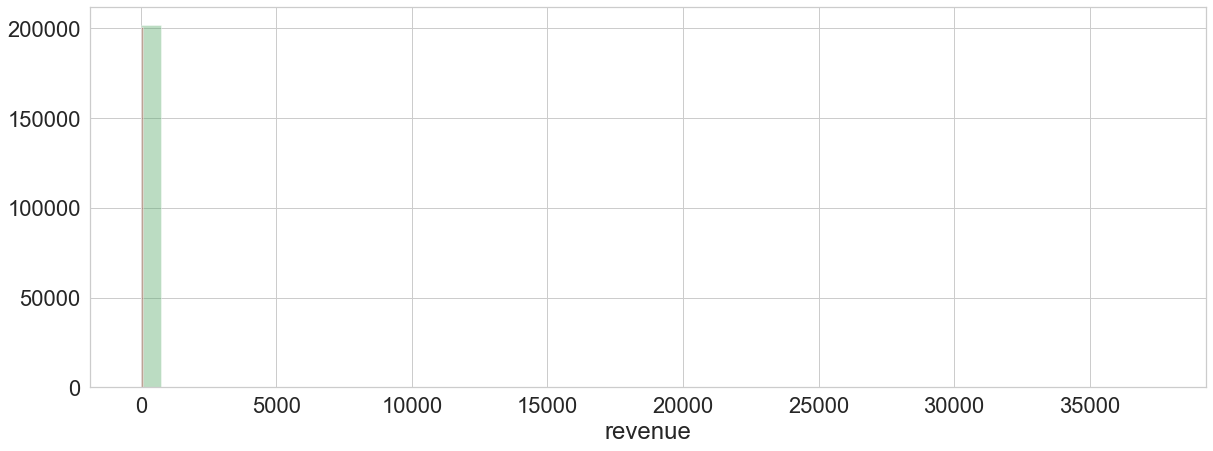

In [54]:
# Распределение по всем данным
sns.distplot(ab_test_data.query('testgroup == "a"').revenue, kde=False, color="g")
sns.distplot(ab_test_data.query('testgroup == "b"').revenue, kde=False, color="r")

<AxesSubplot:xlabel='revenue'>

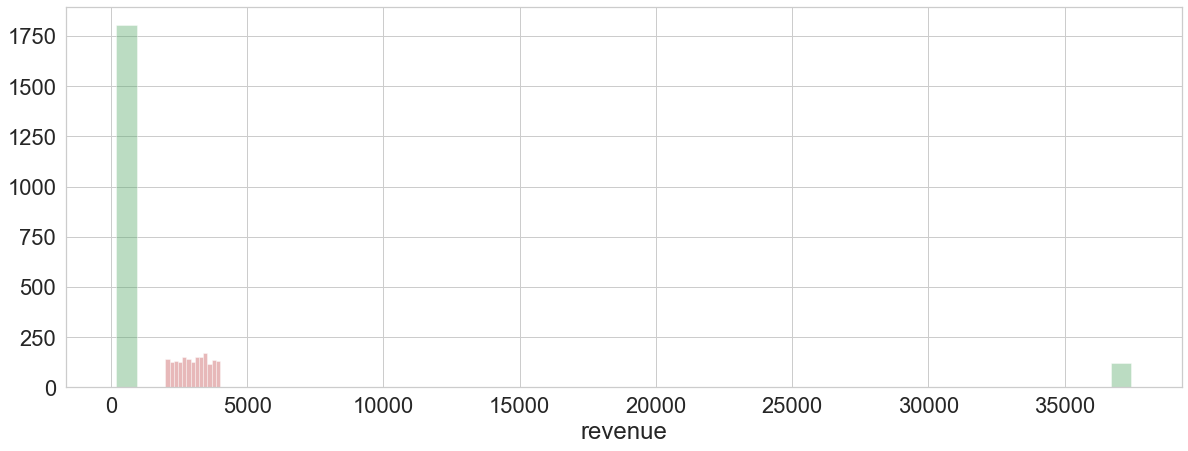

In [55]:
# Посмотрим на распределение показателя пользователей которые совершали покупки в контрольной группе
sns.distplot(ab_test_data.query('testgroup == "a" and revenue > 0').revenue, kde=False, color="g")
# Посмотрим на распределение показателя пользователей которые совершали покупки в тестовой группе
sns.distplot(ab_test_data.query('testgroup == "b" and revenue > 0').revenue, kde=False, color="r")

Посмотрим теперь на выбросы в группах 

<AxesSubplot:xlabel='testgroup', ylabel='revenue'>

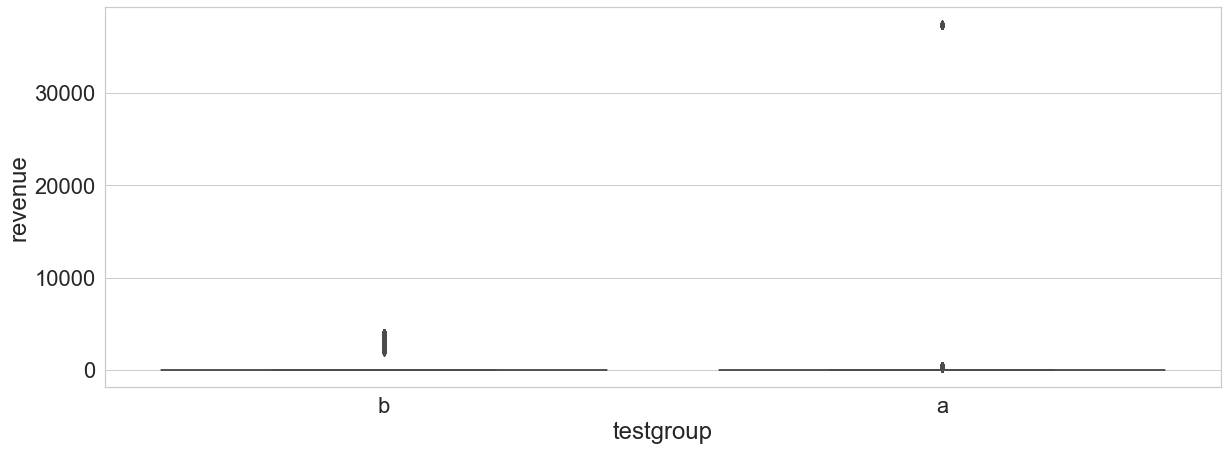

In [56]:
sns.boxplot(x=ab_test_data.testgroup, y=ab_test_data.revenue)

<AxesSubplot:xlabel='testgroup', ylabel='revenue'>

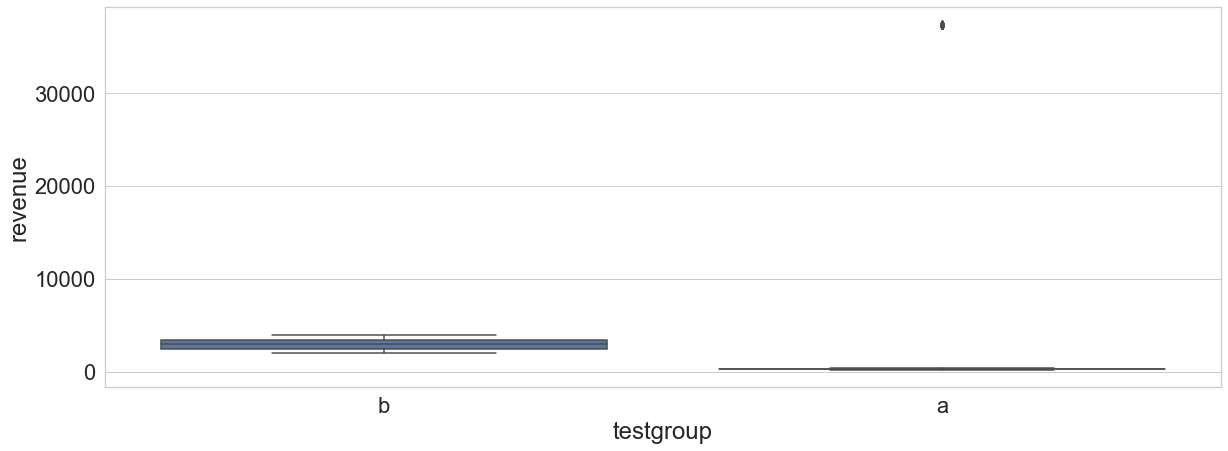

In [57]:
# В группах платящих клиентов
sns.boxplot(x=ab_test_data.testgroup, y=ab_test_data.query('revenue > 0').revenue)

<AxesSubplot:xlabel='testgroup', ylabel='revenue'>

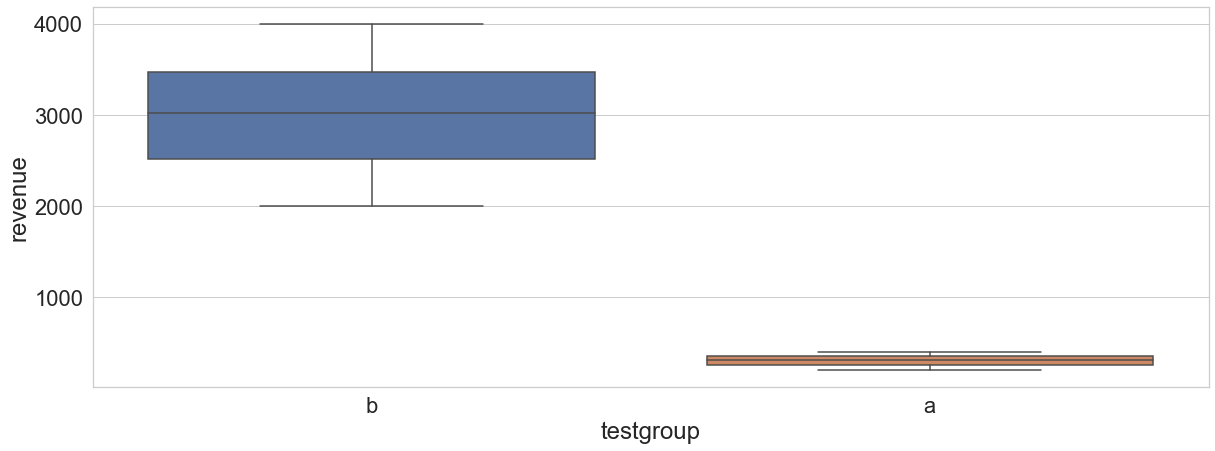

In [58]:
# Теже самые графики, только убрали сильные выбросы и пользователей которые не совершали покупки
sns.boxplot(x=ab_test_data.testgroup, y=ab_test_data.query('revenue < 10000 and revenue > 0').revenue)

На графиках видно, что разница между группами по всему датасету пракически отсутствует и распределение тестовой и контрольной групп находятся около 0.

Но если начать рассматривать данные в разрезе только платящих пользователей то сразу видны различия.
А именно в тестовой группе платежи распределены равномерно между всему чеками, в контрольной же группе много платежей сосредоточены около 0 и присутсвуют внушительные выброса (аномально платящие пользователи).

И судя по boxplot без выбросов в контрольной группе, "аномально платящие пользователи" составляют большую долю выручки, что еще раз подтверждает выводы сделанные выше.

In [59]:
# Подсчитаем количество пользователей с самой большой суммой пкупки в контрольной группе
i = ab_test_data.query('testgroup == "a" and revenue > 10000').shape[0]
o = ab_test_data.query('testgroup == "a" and revenue > 0').shape[0]
print(f"Количество пользователей совершивших самые крупные покупки в контрольной группе: {i} \n\
Количество всех пользователй совершивших покупку в контрольной группе: {o}")

Количество пользователей совершивших самые крупные покупки в контрольной группе: 123 
Количество всех пользователй совершивших покупку в контрольной группе: 1928


In [60]:
# На сколько процентов revenue аномально полатящих пользователей больше, 
# чем revenue всех остальных пользователей в контрольной группе
a_1 = ab_test_data.query('testgroup == "a" and revenue > 10000')['revenue'].sum()
a_2 = ab_test_data.query('testgroup == "a" and revenue < 10000')['revenue'].sum()
round((a_1 - a_2) / a_2 * 100, 2)

740.8

In [61]:
# Как можно видеть, что 123 пользователя в контрольной группе делают основную выручку
ab_test_data.query('revenue < 10000').groupby('testgroup')['revenue'].sum()

testgroup
a     545937
b    5421603
Name: revenue, dtype: int64

In [62]:
 ab_test_data.groupby('testgroup')['revenue'].sum()

testgroup
a    5136189
b    5421603
Name: revenue, dtype: int64

In [63]:
# И все же суммарный показатель revenue больше в тестовой группе, чем в контрольной на 5,6%
round((5421603 - 5136189) / 5136189 * 100, 2)

5.56

**Рассчитаем метрики**

In [64]:
ab_test_data_a = ab_test_data.query('testgroup == "a"')
ab_test_data_b = ab_test_data.query('testgroup == "b"')
ab_test_data_a_no_emissions = ab_test_data_a.query('revenue < 35000')

ab_test_data_a_CR = round((ab_test_data_a.query("revenue > 0").shape[0] / ab_test_data_a.shape[0] * 100), 3)
ab_test_data_a_ARPPU = round(ab_test_data_a.revenue.sum() / ab_test_data_a.query("revenue > 0").shape[0], 2)
ab_test_data_a_ARPU = round(ab_test_data_a_CR * ab_test_data_a_ARPPU, 2)

ab_test_data_b_CR = round((ab_test_data_b.query("revenue > 0").shape[0] / ab_test_data_b.shape[0] * 100), 3)
ab_test_data_b_ARPPU = round(ab_test_data_b.revenue.sum() / ab_test_data_b.query("revenue > 0").shape[0], 2)
ab_test_data_b_ARPU = round(ab_test_data_b_CR * ab_test_data_b_ARPPU, 2)

ab_test_data_a_no_emissions_CR = round((ab_test_data_a_no_emissions.query("revenue > 0").shape[0] 
                                        / ab_test_data_a_no_emissions.shape[0] * 100), 3)
ab_test_data_a_no_emissions_ARPPU = round(ab_test_data_a_no_emissions.revenue.sum() 
                                          / ab_test_data_a_no_emissions.query("revenue > 0").shape[0], 2)
ab_test_data_a_no_emissions_ARPU = round(ab_test_data_a_no_emissions_CR * ab_test_data_a_no_emissions_ARPPU, 2)

print(f'CR для контроля: {ab_test_data_a_CR} \
      \nARPPU для контроля: {ab_test_data_a_ARPPU} \
      \nARPU для контроля: {ab_test_data_a_ARPU}')
print('')
print(f'Если убрать выбросы из контролся получим: \
     \nCR для контроля без выбросов: {ab_test_data_a_no_emissions_CR} \
      \nARPPU для контроля без выбросов: {ab_test_data_a_no_emissions_ARPPU} \
      \nARPU для контроля без выбросов: {ab_test_data_a_no_emissions_ARPU}')
print('')
print(f'CR для теста: {ab_test_data_b_CR} \
      \nARPPU для теста: {ab_test_data_b_ARPPU} \
      \nARPU для теста: {ab_test_data_b_ARPU}')

CR для контроля: 0.954       
ARPPU для контроля: 2664.0       
ARPU для контроля: 2541.46

Если убрать выбросы из контролся получим:      
CR для контроля без выбросов: 0.894       
ARPPU для контроля без выбросов: 302.46       
ARPU для контроля без выбросов: 270.4

CR для теста: 0.891       
ARPPU для теста: 3003.66       
ARPU для теста: 2676.26


Из проведенных расчетов видно, что группа пользователей в составе 123 человек делаю практически всю выручку в контрольной группе. Это особенно видно по показателям ARPPU и ARPU. И хотя эти показатели все равно ниже в контроле при любом раскладе, вариант с отбрасовынием аномалий делает разницу практически в 10 раз. Единственно значение где в любом варианте контроль превосходит тест, это конверсия.

Отсюда можно сделать вывод, что если отбросить аномалии группы как раз сравняются по количеству платящих пользователей.

В первом приближении можность сказать, что если сравнивать группы по параметру конверсии, то немного, но лучше будет контрольная.
Но если смотреть на параметры дохода, тот тут хочется отдать предпочтение тестовой группе

Для дальнейшего понимая стоит воспользоваться статистическими критериями, которые сначала необходимо отобрать.
Для отбора нам нужно ответить не несколько вопросов:
- Тип данныех (количественный / качественный)
- Какому закону распределения почнияются (нормальному или отлично от нормального)
- Зависимы ли группу
- Количество сравниваемых групп

Ответим на эти вопросы:
1. Тип данных количественный
2. Судя из графиков распределение отлично от нормального
3. Группы независимы и не имеют пересечений
4. Количество групп 2


In [65]:
# Убедимся в предположении о нормальности распределения
# Это можно было бы сделать методом Шапиро-Уилка но,
# Метод Шапиро работает плохо с большими выборками, поэтому используют другой тест normaltest
ss.normaltest(ab_test_data.query('testgroup == "a"').revenue)

NormaltestResult(statistic=585152.7312728433, pvalue=0.0)

In [66]:
# Для тестовой группы
ss.normaltest(ab_test_data.query('testgroup == "b"').revenue)

NormaltestResult(statistic=326622.39540856465, pvalue=0.0)

Тест показал, что распределения очень далеки от нормального, что и требовалось доказать

In [67]:
# Проверим выборки на гомогенность дисперсий 
ss.levene(ab_test_data_a.revenue, ab_test_data_a.revenue)

LeveneResult(statistic=0.0, pvalue=1.0)

Необходимого нам результата не получили, а значит дисперсии действительно значительно отличаются в группах

**Выбор критериев**
С текущим набором атрибутов нам подойдут следующие критерии:
- T-test. Хотя он предъявляет достаточно строгие требования к данным, стоит сделать оговорку. Что данный тест может работать и с данными распределение которых отлично от нормального, если выборка достаточно большого размера
- Критерий Манна-Уитни
- Bootstrap

Но перед использованием данных критериев необходимо их **провалидировать** проведя АА тест на сгенерированных распределениях  отличных от нормального.

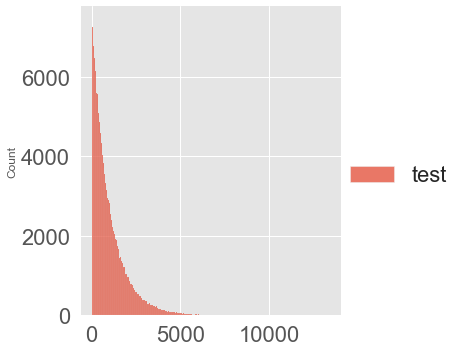

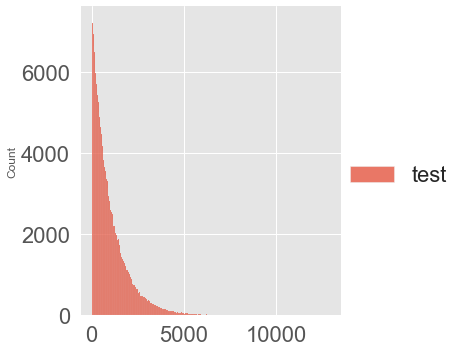

In [90]:
# Генерируем тестовые датасеты
# Так как у нас данные о выруче, сгенерируем экспоненциальное распределение
test_x = pd.Index(ss.expon(scale=1000).rvs(200000), name='test').to_series().to_frame()
test_y = pd.Index(ss.expon(scale=1000).rvs(200000), name='test').to_series().to_frame()
sns.displot(test_y)
sns.displot(test_x)

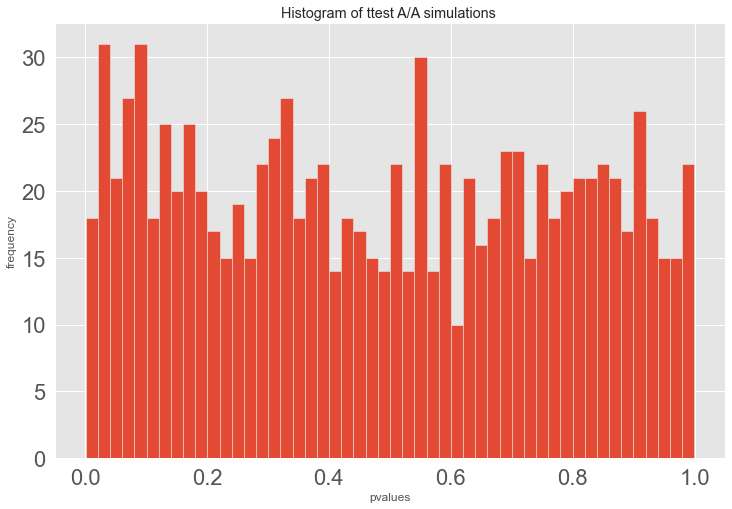

0.06

In [91]:
simulations = 1000
n_s = 1000
res = []

# Запуск симуляций A/A теста
for i in tqdm(range(simulations)):
    s1 = test_x.test.sample(n_s, replace=False).values
    s2 = test_y.test.sample(n_s, replace=False).values
    res.append(ss.ttest_ind(s1, s2, equal_var=False)[1])  # сохраняем pvalue

plt.hist(res, bins=50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
sum(np.array(res) < 0.05) / simulations

Значение Ттеста выше альфа, а значит мы будет ошибаться чаще, чем в 5% случаев, что делает критерий менее мощным. Но стоит сделать оговорку, что в ряде случаев показатель может быть удовлетворительным

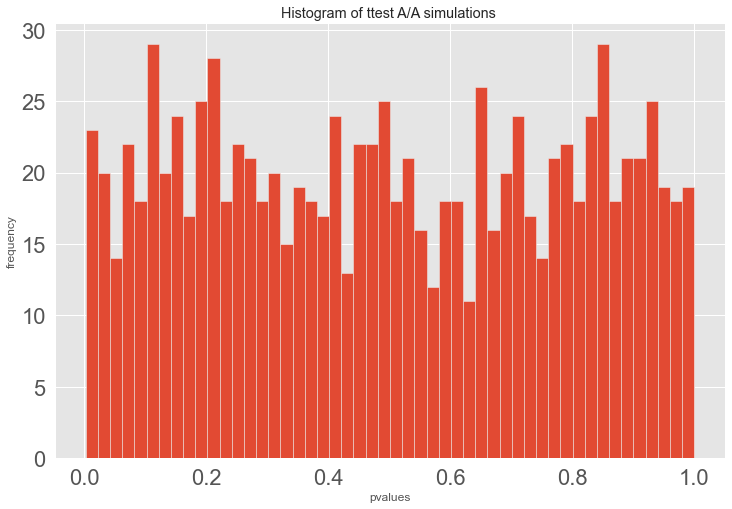

0.047

In [93]:
simulations = 1000
n_s = 1000
res = []

# Запуск симуляций A/A теста
for i in tqdm(range(simulations)):
    s1 = test_x.test.sample(n_s, replace=False).values
    s2 = test_y.test.sample(n_s, replace=False).values
    res.append(ss.mannwhitneyu(s1, s2)[1])  # сохраняем pvalue

plt.hist(res, bins=50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
sum(np.array(res) < 0.05) / simulations

Манна-Уитни справился с тестом, но полученное значение близко к границе

In [71]:
# Объявим функцию, которая позволит проверять гипотезы с помощью бутстрапа
def get_bootstrap(
    data_column_1,  # числовые значения первой выборки
    data_column_2,  # числовые значения второй выборки
    boot_it=1000,  # количество бутстрэп-подвыборок
    statistic=np.mean,  # интересующая нас статистика
    bootstrap_conf_level=0.95  # уровень значимости
):
    boot_len = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    for i in tqdm(range(boot_it)):  # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            boot_len, 
            replace=True  # параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            boot_len, 
            replace=True
        ).values
        
        boot_data.append(statistic(samples_1 - samples_2))  # mean() - применяем статистику
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level) / 2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    quants = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = ss.norm.cdf(
        x=0, 
        loc=np.mean(boot_data), 
        scale=np.std(boot_data)
    )
    p_2 = ss.norm.cdf(
        x=0, 
        loc=-np.mean(boot_data), 
        scale=np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    _, _, bars = plt.hist(pd_boot_data[0], bins=50)
    for bar in bars:
        if abs(bar.get_x()) <= quants.iloc[0][0] or abs(bar.get_x()) >= quants.iloc[1][0]:
            bar.set_facecolor('red')
        else: 
            bar.set_facecolor('grey')
            bar.set_edgecolor('black')
    
    plt.style.use('ggplot')
    plt.vlines(quants, ymin=0, ymax=50, linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title('Histogram of boot_data')
    plt.rcParams['figure.figsize'] = (12, 8)
    plt.show()
       
    return {'boot_data': boot_data, 
            'quants': quants, 
            'p_value': p_value}

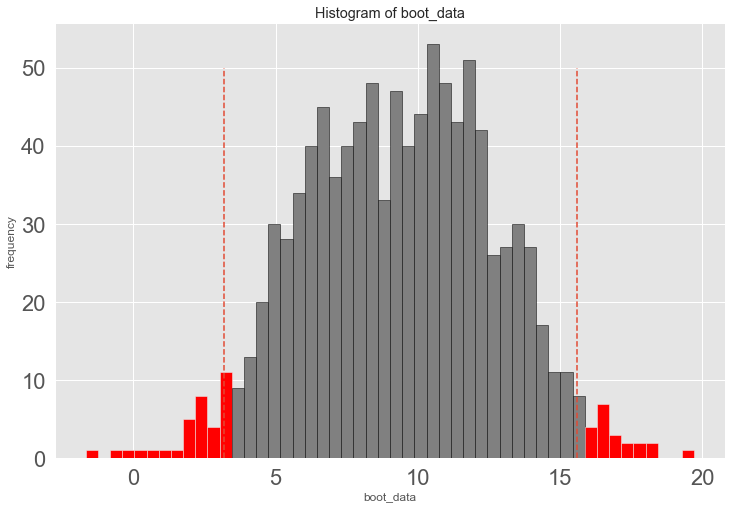

0.004819852330294415

In [97]:
f = get_bootstrap(test_x.test, test_y.test, boot_it=1000)
f['p_value']

In [95]:
ss.mannwhitneyu(test_x.test, test_y.test)[1]

0.02288221923878097

In [98]:
ss.ttest_ind(test_x.test, test_y.test, equal_var=False)[1]

0.0033761814767009892

Провалидировав методы и замерив показатели всех 3х тестов в конце, видим, что в действительности все критерии справились с задачей, но предпочтение стоит отдать Бутстрап, так как он считает интересующие нас метрики и показывает надежный стат значимости. Что касается Ттеста, он тоже справился в финальном замере, но выше мы видили, что вероятность допущения ошибки выше чем нужно, что делает его менее надежным. Манна-Уитни, казалось бы, идеально подходит к проверке стат значимости в нашем случае, но стоить помнить, что он сравнивает ранги в группах и достаточно трудно интерпретируем. 

**Вывод**

Можно воспользоваться всеми тремя методами, но предпочтение отдадим Бутстрап

Тестировать будем гипотезу которую можно сформулировать следующим образом:
- H0: Распределене выручки в контроле и тесте не различаются
- H1: Распределение выручки в контроле и тесте различны

Но перед проведением теста стоит сделать оговорку, что тестирование будет проводить без выбросов, так как на данном датасете это самое оптимальное решение по уменьшению дисбаланса.

In [75]:
ab_test_data_no_emissions = ab_test_data.query('revenue < 35000')

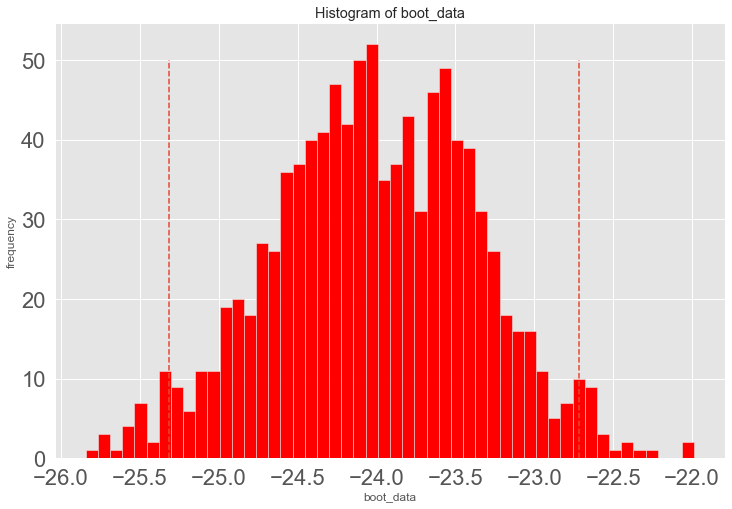

2.850442046070547e-300

In [76]:
h = get_bootstrap(ab_test_data_no_emissions.query('testgroup == "a"').revenue,
                  ab_test_data_no_emissions.query('testgroup == "b"').revenue, boot_it=1000)
h['p_value']

Видим, что p_value гораздо ниже альфа и 0 отсутсвует в полученном интервале, принимает альтернативную гипотезу

Проверим различие CR, ARPPU и ARPU в группах, чтобы принять дальнейшее решение.

In [77]:
# Начнем с конверсии в покупку
# Для этого добавим новую колонку, где 0 пользователь не совершил покупку, 1 пользователь что-то приобрел

ab_test_data_no_emissions['CR'] = np.where(ab_test_data_no_emissions.revenue > 0, 1, 0)

In [78]:
# Проверим количество платящих пользователей без учета выбрасов
ab_test_data_no_emissions.query('CR > 0').shape[0]

3610

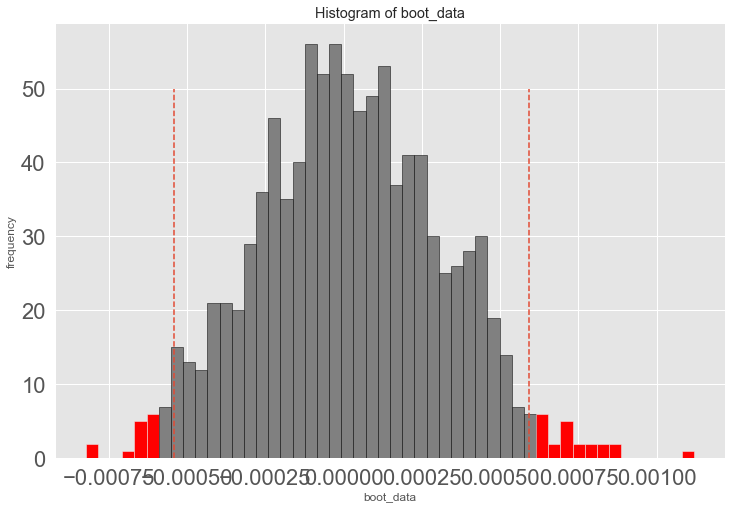

0.9416768382419703

In [79]:
# CR без выбросов
f_2 = get_bootstrap(ab_test_data_no_emissions.query('testgroup == "a"').CR,
                    ab_test_data_no_emissions.query('testgroup == "b"').CR)
f_2['p_value']

In [80]:
print(f'Действительно, конверсия пользователей в группах после избавления от выбросов практически одинакова: \
     \nCR для контроля без выбросов: {ab_test_data_a_no_emissions_CR} \
     \nCR для теста: {ab_test_data_b_CR}')

Действительно, конверсия пользователей в группах после избавления от выбросов практически одинакова:      
CR для контроля без выбросов: 0.894      
CR для теста: 0.891


По давнному показателю нельзя отдать предпочтение ни одной из групп

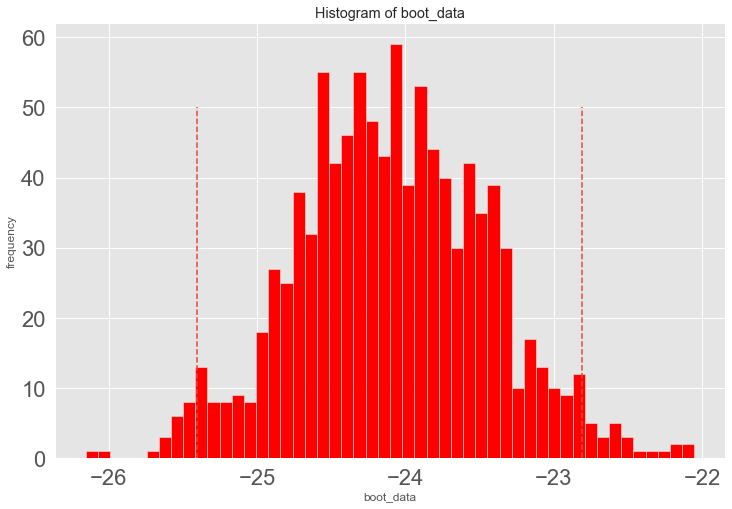

2.0648404876258427e-308

In [81]:
# Проверим разницу в средней выручке на одного пользователя ARPU 
f_3 = get_bootstrap(ab_test_data_no_emissions.query('testgroup == "a"').revenue,
                    ab_test_data_no_emissions.query('testgroup == "b"').revenue)
f_3['p_value']

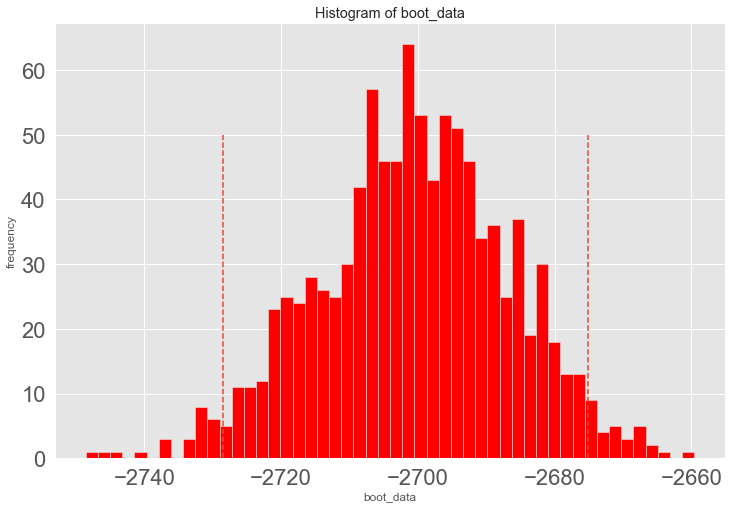

0.0

In [82]:
# Проверим средний доход на Платящего пользователя ARPPU 
f_4 = get_bootstrap(ab_test_data_no_emissions.query('testgroup == "a" and revenue > 0').revenue,
                    ab_test_data_no_emissions.query('testgroup == "b" and revenue > 0').revenue)
f_4['p_value']

## Выводы

По проведенному анализу выбран набор подходящих методов и основным был выбран Бутстрап. Так же проанализированы распределения в группах и найдены выбросы, которые могли попасть из-за неисправности системы сплитования или же данные в контрольной группе таким образом описывают акцию, что такое предложения не для всех, ведь в полной мере их смолгло позволить 123 человека из практически 2000 платящих пользователей в контрольной группе.

В тестовой же группе суммы чеков распределились равномерно и дисперсия в данной группе на порядок ниже, чем в контрольной.

Так же были посчитаны и проанализированы следующие метрики:
- ARPPU средний доход с платящих пользователей (клиентов)
- Конверсия в покупку (CR)
- ARPU средний доход с привлеченного пользователя

По полученным рассчетам получили, что конверсия после удаления выбрасов не отличается в группах, а вот показатели **ARPPU** и **ARPU** значительно разняться в пользу тестовой группы.

И хоть расчеты были произведены после избавления от выбрасов, что не желательно делать, другого варианта профильтровать данные не было, так как во фреме присутствующей информации было не достаточно. Но даже так значительно различие в группах было доказано с помощью визуализации и Бутстрапа и показали, что группа платящих в тесте на порядок "крепче", чем в контроле, так как потеряв хотябы 10% из группу "аномально платящих пользователей" мы значительно ухудшим показатели продукта в контроле, чего нельзя сказать о платящих пользователях в тесте.

Ответ: выбираем акцию проводимую в тестовой группе Б

## Задание 3

В игре Plants & Gardens каждый месяц проводятся тематические события, ограниченные по времени. В них игроки могут получить уникальные предметы для сада и персонажей, дополнительные монеты или бонусы. Для получения награды требуется пройти ряд уровней за определенное время. С помощью каких метрик можно оценить результаты последнего прошедшего события?

Предположим, в другом событии мы усложнили механику событий так, что при каждой неудачной попытке выполнения уровня игрок будет откатываться на несколько уровней назад. Изменится ли набор метрик оценки результата? Если да, то как?

### Для первого варианта события

* **DAU/MAU/WAU** - для оценки количества уникальных пользователей. Оценить, на сколько сильно текущий ивент привлекателен для пользователей или наоборот. Так же было бы хорошо посмотреть в разрезе по возрастной категории.
* **Средняя дневная аудитория** за определенный период.
* **CR** в целевое действие в момент проведения ивент. Подталкивает ли ивент к осуществлению больших покупок пользователей или нет, а может наоборт ухудшает этот показатель за счет добычи ценностей внутреигровым путем.
* **Retention** ивента - на сколько много людей возвращается во время ивента. Поможет продемонстрировать необходимость события для пользователей. Возможно выявить когорту, которая наиболее активно именно в момент ивента по сравнению с рядовым днем в игре.
* **Средняя продолжительность сессии** - насколько увеличилось/уменьшилось нахождение в игре у пользователей.
* **Stickiness rate** - на сколько регулярно пользователь стал использовать приложение.
* **Average Transaction Value** — средняя стоимость покупок за период, средний чек.
* **Внутреигровая экономика** - отслеживать количество валюты до ивента и после, а так же получение новых редких предметов, чтобы в дальнейшем не переносытить рынок и не обесценить предметы/валюту.
* **Churn by Level** - показатель сложности уровня или наоборот этап выдался скучным и пользователь не стал его проходить.

Интересно было бы просмотреть все приведенные метрки как по всей совокупности пользователей участвующих в ивенте, так и в разрезе по возрасту. Это даст понимание о составе аудитории, а так же кого больше привлекает событие (более старших или младших возрастов)

### Для усложненного варианта

Остануться теже метрики, но особенно пристально стоит посмотреть на Retention, Churn by Level, Средняя дневная аудитория. Интерес здесь вызывает на сколько сложным окажется новая механика и сколько игроков будут готовы играть по таким правилам, а так же посмотреть наиболее сложный или легкий уровень.

Из нового можно добавить просмотр метрик лояльности и удовлетворенности, так как первый вариант это классическое проведение ивента, то второй вариант проведение ивента с "Утяжелением" и тут можно было бы узнать у самих игроков, что они думают о таком способе проведение события (пообщаться с комьюнити).
* **NPS** - лояльность пользователей. К примеру измерить данный показатель заблаговременно до начала проведения ивента.
* **CSAT** - оценка удовлетворенности клиента. Замерить данный показатель в отношении 1-го варианта проведения ивента и 2-го, на основании полученного сделать вывод, на сколько пользователи довольны. Возможно этот показатель поможет миксовать типы ивентов.

Так же в реализации двух названных метрик можно предусмотреть дополнительный вариант с расширенным ответом.




